# Boston House Prices Dataset

The **Boston Housing Dataset** is derived from information collected by the U.S. Census Service concerning housing in the area of Boston, MA.  
The following describes the dataset columns:

- **CRIM** — per capita crime rate by town  
- **ZN** — proportion of residential land zoned for lots over 25,000 sq.ft.  
- **INDUS** — proportion of non-retail business acres per town  
- **CHAS** — Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
- **NOX** — nitric oxides concentration (parts per 10 million)  
- **RM** — average number of rooms per dwelling  
- **AGE** — proportion of owner-occupied units built prior to 1940  
- **DIS** — weighted distances to five Boston employment centres  
- **RAD** — index of accessibility to radial highways  
- **TAX** — full-value property-tax rate per \$10,000  
- **PTRATIO** — pupil-teacher ratio by town  
- **B** — 1000(Bk − 0.63)² where Bk is the proportion of Black residents by town  
- **LSTAT** — % lower status of the population  
- **MEDV** — median value of owner-occupied homes in \$1000’s

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
boston = pd.read_csv("/kaggle/input/bostonhousepricedata/Boston-house-price-data.csv")

In [3]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Exploratory Data Analysis

In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# Summarizing stats of data
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Check missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Correlation

In [7]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


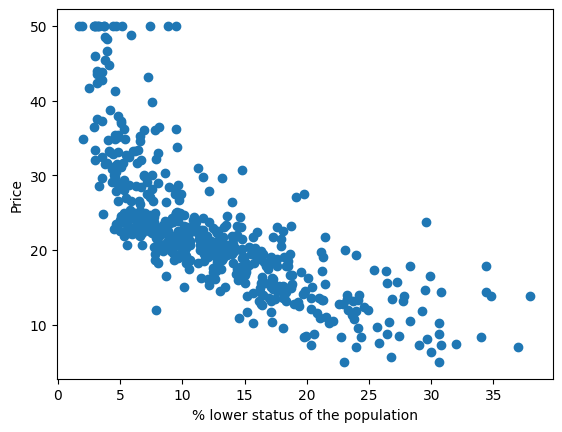

In [8]:
plt.scatter(boston['LSTAT'], boston['MEDV'])
plt.xlabel("% lower status of the population")
plt.ylabel("Price")
plt.show()

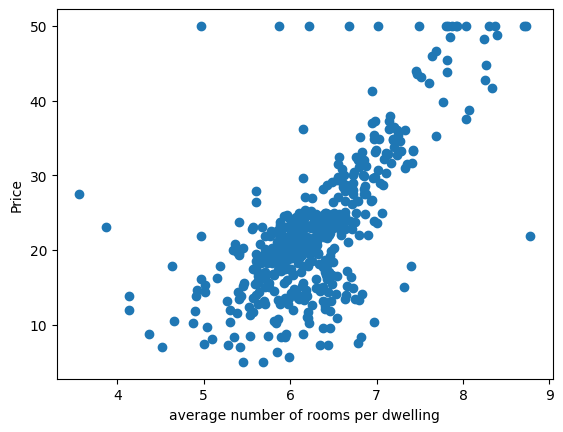

In [9]:
plt.scatter(boston['RM'], boston['MEDV'])
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Price")
plt.show()

<Axes: xlabel='LSTAT', ylabel='MEDV'>

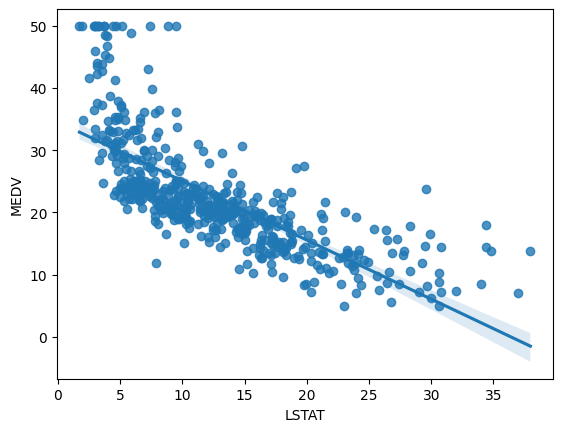

In [10]:
sns.regplot(x='LSTAT', y='MEDV', data=boston)

<Axes: xlabel='RM', ylabel='MEDV'>

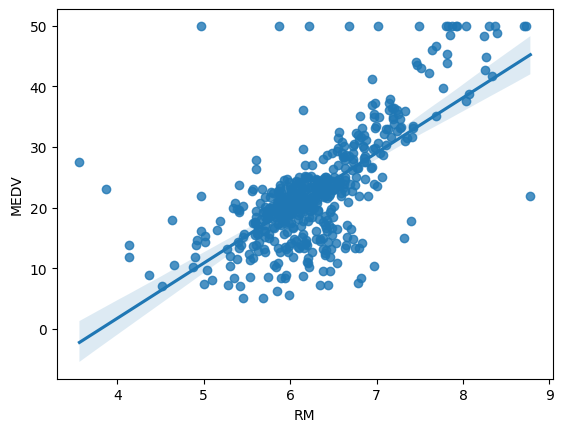

In [11]:
sns.regplot(x='RM', y='MEDV', data=boston)

# Preprocessing

## Separating Independent and Dependent features

In [12]:
X = boston.iloc[:,:-1]
y = boston.iloc[:,-1]

In [13]:
X["LSTAT"] = np.log(X["LSTAT"])
X["LSTAT"]

0      1.605430
1      2.212660
2      1.393766
3      1.078410
4      1.673351
         ...   
501    2.269028
502    2.206074
503    1.729884
504    1.868721
505    2.064328
Name: LSTAT, Length: 506, dtype: float64

## Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standardize the data

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [16]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Print coefficidnts and the intercept

print(model.coef_)
print(model.intercept_)

[-1.21284814  0.43654463  0.18724528  0.62299758 -1.55952936  1.81251218
  0.29895135 -2.55595982  2.22451833 -1.48938982 -1.88409484  0.85937935
 -5.58956835]
23.01581920903954


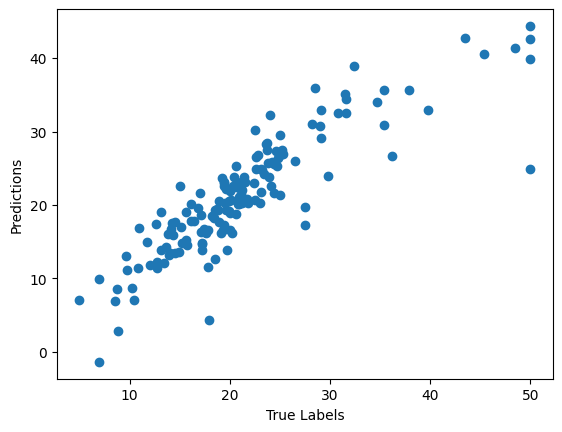

In [18]:
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


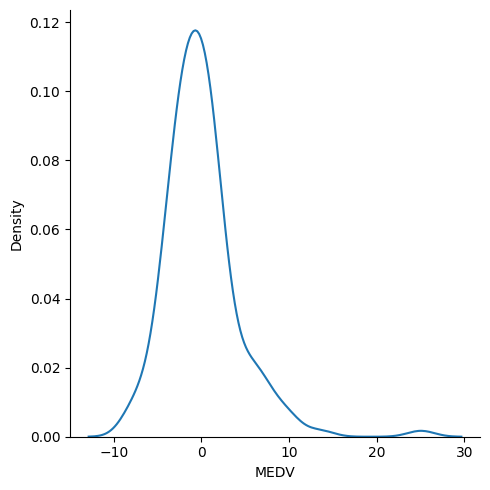

In [19]:
residuals = y_test - y_pred
sns.displot(residuals, kind="kde")
plt.show()

## Performance Metrics

In [20]:
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
MSE = mean_squared_error(y_pred, y_test)
MAE = mean_absolute_error(y_pred, y_test)

print(f"MSE = {MSE}")
print(f"RMSE = {RMSE}")
print(f"MAE = {MAE}")

MSE = 17.466773895133784
RMSE = 4.179326966765556
MAE = 2.897550792557264


### R2 score and Adjusted R2 score

In [21]:
r2score = r2_score(y_pred, y_test)
r2score

0.7351378651202358

In [22]:
adjusted_r2 = 1 - (1 - r2score)*((len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1))
adjusted_r2

0.7101870842982291

## Predictions

In [23]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [24]:
model.predict(scaler.transform(np.array(X.iloc[5]).reshape(1, -1)))

array([28.04285987])

# Pickling model file for Deployment

In [25]:
import pickle

pickle.dump(model, open("boston_reg.pkl", "wb"))
pickled_model = pickle.load(open("boston_reg.pkl", "rb"))
pickled_model.predict(scaler.transform(np.array(X.iloc[0]).reshape(1, -1)))

array([32.24758653])